# Heuristic Player Exploration
How does the Heuristic Player perform? How does it compare to the Random Player? Can we identify any obvious weaknesses in the heuristics that could be exploited?

Note that for each experiment, we run 30 trials as a small denoising effort.

**First Edit Date**: 2/15/2022<br/>
**Last Edit Date**: 2/15/2022

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from game_assets.table import Table
from game_assets.players.heuristic_player import HeuristicPlayer
from game_assets.players.random_player import RandomPlayer

In [2]:
# Plotting constants 
TITLE_FSIZE = 20
LABEL_FSIZE = 16
LEGEND_FSIZE = 16
TICK_LABEL_FSIZE = 12

## Reviewing Heuritstic Player performance
Compare Heuristic Player Performance to itself, and to a team of random agents

In [11]:
# set up a table with 4 random players
heuristic_players = [HeuristicPlayer(i) for i in range(4)]

In [15]:
# sample out n rounds m times
m_samples = 30
# generate the scores over n rounds 
n_rounds = 1000
t0_scores = np.zeros((m_samples, n_rounds))
t1_scores = np.zeros((m_samples, n_rounds))

for i in range(m_samples):
    #reset the table 
    h_table = Table(*heuristic_players)
    for j in range(n_rounds):
        # play a hand
        h_table.play_hand()
        # get and record current scores
        t0_scores[i,j],t1_scores[i, j]  = h_table.get_scores()

In [16]:
#average scores across the trials
t0_score_avg = np.mean(t0_scores, axis = 0)
t1_score_avg = np.mean(t1_scores, axis = 0)

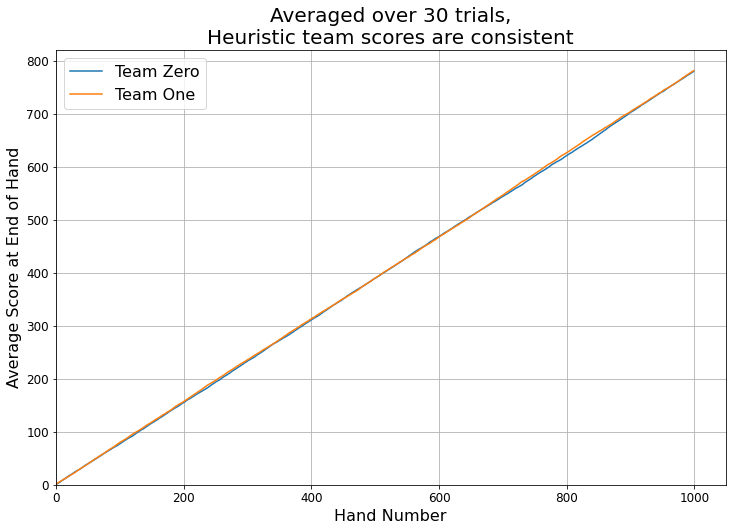

In [17]:
# plot the scores from the averaged trials 
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
ax.plot(t0_score_avg, label = "Team Zero")
ax.plot(t1_score_avg, label = "Team One")

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.set_xlabel("Hand Number", size = LABEL_FSIZE)
ax.set_ylabel("Average Score at End of Hand", size = LABEL_FSIZE)

for l in ax.get_xticklabels() + ax.get_yticklabels():
    l.set_fontsize(TICK_LABEL_FSIZE)

plt.title(f"Averaged over {m_samples} trials,\nHeuristic team scores are consistent", size = TITLE_FSIZE)
plt.legend(prop={'size': LEGEND_FSIZE})
plt.grid()
plt.show()

Unsurprisingly, scores are consistent when we pit two teams of random players against one another. Repeatedely running the above code, we see that although there is noise, average performance is consistent (an analysis similar to those performed in `random_agent_performance`, where sample sizes are larger, could provide more evidence).

In [24]:
# sample out n rounds m times
m_samples = 30
# generate the scores over n rounds 
n_rounds = 1000
t0_scores = np.zeros((m_samples, n_rounds))
t1_scores = np.zeros((m_samples, n_rounds))

for i in range(m_samples):
    #reset the table 
    hr_table = Table(HeuristicPlayer(0), RandomPlayer(1), HeuristicPlayer(2), RandomPlayer(3))
    for j in range(n_rounds):
        # play a hand
        hr_table.play_hand()
        # get and record current scores
        t0_scores[i,j],t1_scores[i, j]  = hr_table.get_scores()

In [25]:
#average scores across the trials
t0_score_avg = np.mean(t0_scores, axis = 0)
t1_score_avg = np.mean(t1_scores, axis = 0)

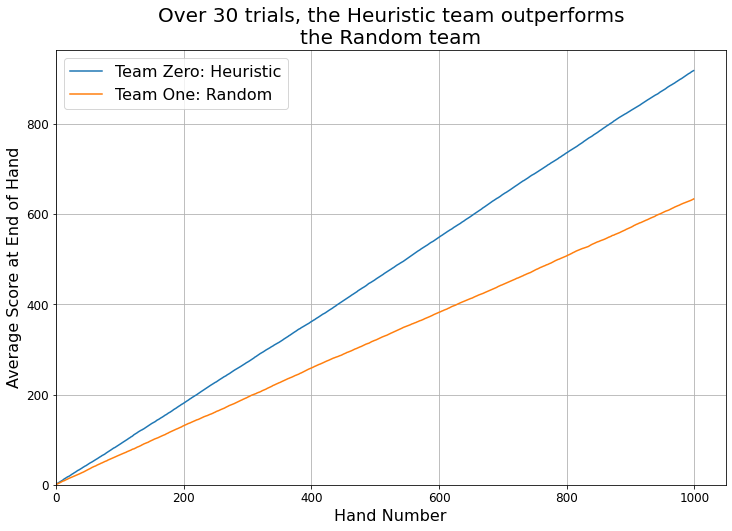

In [26]:
# plot the scores 
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
ax.plot(t0_score_avg, label = "Team Zero: Heuristic")
ax.plot(t1_score_avg, label = "Team One: Random")

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.set_xlabel("Hand Number", size = LABEL_FSIZE)
ax.set_ylabel("Average Score at End of Hand", size = LABEL_FSIZE)

for l in ax.get_xticklabels() + ax.get_yticklabels():
    l.set_fontsize(TICK_LABEL_FSIZE)

plt.title(f"Over {m_samples} trials, the Heuristic team outperforms\nthe Random team", size = TITLE_FSIZE)
plt.legend(prop={'size': LEGEND_FSIZE})
plt.grid()
plt.show()

Above, we can see that the heuristic team scores nearly 1.5:1 points over the random team. This suggest that the Heuristic pattern is a dominant strategy (although there's room for improvement).

In [ ]:
# todo: expose some parameters for heuristic player. Vary & compare.